Noisy Results: {'101': 46, '110': 45, '001': 43, '100': 38, '011': 43, '111': 368, '010': 69, '000': 372}


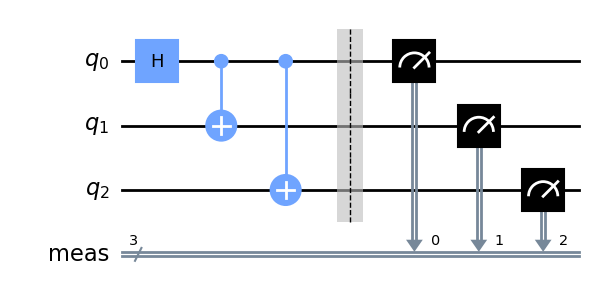

In [4]:
#-------------------------------------------------------------------------
# Another Error Correction Simulation
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work is required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from qiskit.providers.aer.noise import NoiseModel, pauli_error
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer
#-------------------------------------------------------------------------

# Define a simple noise model
noise_model = NoiseModel()
error = pauli_error([('X', 0.1), ('I', 0.9)])
noise_model.add_all_qubit_quantum_error(error, 'measure')

# Define a quantum circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

# Simulate with noise
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator, noise_model=noise_model).result()
print("Noisy Results:", result.get_counts())

# Display the complete circuit
display(circuit_drawer(qc, output='mpl', style="iqp"))